In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout, GRU
import os

# SET WORK DERC

# For my Mac
# os.chdir('//Users//patricklee//Desktop//파이썬//DACON//2020DACON_CUP')

# For my Desktop
os.chdir('C://Users//BIS_COM//data//dacon/workout/')

In [2]:
train=pd.read_csv('./train_features.csv')
train_labels=pd.read_csv('./train_labels.csv')
test=pd.read_csv('./test_features.csv')
submission=pd.read_csv('./sample_submission.csv')

In [3]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [4]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

In [5]:
train_labels['label_desc'].value_counts()

Non-Exercise                                    1518
Device on Table                                   97
Plank                                             55
Wall Squat                                        48
Jump Rope                                         47
                                                ... 
Triceps Kickback (knee on bench) (right arm)      13
Dumbbell Row (knee on bench) (right arm)          12
Dumbbell Row (knee on bench) (left arm)           12
Triceps Kickback (knee on bench) (left arm)       12
Arm Band Adjustment                               12
Name: label_desc, Length: 61, dtype: int64

In [6]:
# train = pd.merge(train,train_labels,on='id',how='inner')

In [7]:
# train

In [ ]:
train_no26 = train[train['label']!=26]

In [ ]:
train_no26

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,37,Shoulder Press (dumbbell)
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,37,Shoulder Press (dumbbell)
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,37,Shoulder Press (dumbbell)
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,37,Shoulder Press (dumbbell)
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,37,Shoulder Press (dumbbell)
...,...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,2,Bicep Curl
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,2,Bicep Curl
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,2,Bicep Curl
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,2,Bicep Curl


In [8]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [9]:
def non(train):
    if train == 26:
        return 0
    else:
        return 1

In [10]:
train_labels['non_ex_yn'] = train_labels['label'].apply(non)

In [11]:
X=tf.reshape(np.array(train.iloc[:,2:8]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [12]:
y = tf.keras.utils.to_categorical(train_labels['non_ex_yn']) 
y.shape

(3125, 2)

In [15]:
y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [16]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, LSTM,Dropout, GRU

In [17]:
# model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(600,6)))
# model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.5))
# model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
# model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.5))

# model.add(LSTM(55))

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(61, activation='softmax'))

# model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.004), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# model.fit(X,y, epochs=200, batch_size=128, validation_split=0.2)

Epoch 1/200


ValueError: in user code:

    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\BIS_COM\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 2) and (None, 61) are incompatible


In [19]:
model = Sequential()
model.add(Conv1D(filters = 32,kernel_size= 5, activation='relu',input_shape=(600,6)))
model.add(Conv1D(kernel_size=5, filters = 64,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters = 128,kernel_size= 5, activation='relu',input_shape=(600,6)))
model.add(Conv1D(kernel_size=5, filters=256,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(LSTM(55))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 596, 32)           992       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 592, 64)           10304     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 296, 64)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 296, 64)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 292, 128)          41088     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 288, 256)          164096    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 144, 256)         

In [34]:
history = model.fit(X,y, epochs=50, batch_size=128, validation_split=0.2,verbose=0)

In [35]:
mae_history = history.history['val_loss']
mae_history

[0.6361336708068848,
 0.6395554542541504,
 0.781002938747406,
 0.7908313274383545,
 0.5311207175254822,
 0.6458837985992432,
 0.5615805983543396,
 0.7080666422843933,
 0.5466253161430359,
 0.660423755645752,
 0.5584923624992371,
 0.5019962191581726,
 0.5182498693466187,
 0.49611973762512207,
 0.6046167612075806,
 0.7381724715232849,
 0.7197027802467346,
 0.4903116226196289,
 0.5174251794815063,
 0.6013076901435852,
 0.5305745601654053,
 0.6184834241867065,
 0.644065797328949,
 0.8131237030029297,
 0.6445695757865906,
 0.43930819630622864,
 0.44276705384254456,
 0.6874353885650635,
 0.6210561990737915,
 0.5203456282615662,
 0.6030954122543335,
 0.8685044050216675,
 0.5577847361564636,
 0.6321051120758057,
 0.574823260307312,
 0.6519463658332825,
 0.7970768213272095,
 0.536547839641571,
 0.4398688077926636,
 0.5418626666069031,
 0.5829435586929321,
 0.5919684171676636,
 0.5407953858375549,
 0.7603256702423096,
 0.6053766012191772,
 0.6257385015487671,
 0.8026280403137207,
 0.828878998756

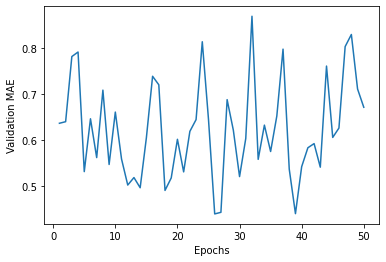

In [36]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

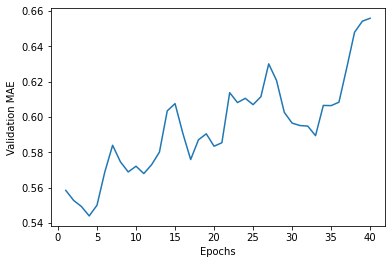

In [38]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


smooth_mae_history = smooth_curve(mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
X_no26=tf.reshape(np.array(train_no26.iloc[:,2:8]),[-1, 600, 6])
X_no26.shape

TensorShape([1607, 600, 6])

In [ ]:
train_labels_t = train_labels[train_labels['non_ex_yn']==1]

In [ ]:
train_labels_t

,id,label,label_desc,non_ex_yn,no37
0,0,37,Shoulder Press (dumbbell),1,1
2,2,3,Biceps Curl (band),1,0
12,12,39,Side Plank Right side,1,0
13,13,28,Plank,1,0
20,20,6,Chest Press (rack),1,0
...,...,...,...,...,...
3117,3117,60,Wall Squat,1,0
3118,3118,53,Triceps Kickback (knee on bench) (right arm),1,0
3119,3119,17,Fast Alternating Punches,1,0
3122,3122,15,Dynamic Stretch (at your own pace),1,0


In [ ]:
y_no_26 = tf.keras.utils.to_categorical(train_labels_t['label'])
y_no_26.shape

(1607, 61)

In [ ]:
y_no_26

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model_t = Sequential()
model_t.add(Conv1D(filters = 32,kernel_size= 5, activation='relu',input_shape=(600,6)))
model_t.add(Conv1D(kernel_size=5, filters = 64,activation='relu'))
model_t.add(MaxPooling1D(pool_size=2))
model_t.add(Dropout(0.5))
model_t.add(Conv1D(filters = 128,kernel_size= 5, activation='relu',input_shape=(600,6)))
model_t.add(Conv1D(kernel_size=5, filters=256,activation='relu'))
model_t.add(MaxPooling1D(pool_size=2))
model_t.add(Dropout(0.5))
model_t.add(LSTM(55))
model_t.add(Dense(128, activation='relu'))
model_t.add(Dense(61, activation='softmax'))
model_t.summary()

model_t.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 596, 32)           992       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 592, 64)           10304     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 296, 64)           0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 296, 64)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 292, 128)          41088     
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 288, 256)          164096    
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 144, 256)         

In [ ]:
model_t.fit(X_no26,y_no_26, epochs=200, batch_size=128, validation_split=0.2)

- non_exercise만 빼서 한 실험은 성공적임.
- non_exercise를 뺀 나머지 데이터 학습은 안좋음
- 아무래도 너무 많은 레이블이 있어서 그런듯
- 모든 경우의 모델을 만드는게 가장 성능이 좋을 것으로 보임

In [ ]:
train_no26

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,37,Shoulder Press (dumbbell)
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,37,Shoulder Press (dumbbell)
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,37,Shoulder Press (dumbbell)
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,37,Shoulder Press (dumbbell)
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,37,Shoulder Press (dumbbell)
...,...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,2,Bicep Curl
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,2,Bicep Curl
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,2,Bicep Curl
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,2,Bicep Curl


In [ ]:
def shoulder(df):
    if df == 37:
        return 1
    else:
        return 0

In [ ]:
train_no26['no37'] = train_no26['label'].apply(shoulder)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_no26

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc,no37
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,37,Shoulder Press (dumbbell),1
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,37,Shoulder Press (dumbbell),1
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,37,Shoulder Press (dumbbell),1
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,37,Shoulder Press (dumbbell),1
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,37,Shoulder Press (dumbbell),1
...,...,...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,2,Bicep Curl,0
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,2,Bicep Curl,0
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,2,Bicep Curl,0
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,2,Bicep Curl,0


In [ ]:
X=tf.reshape(np.array(train_no26.iloc[:,2:8]),[-1, 600, 6])
X.shape

TensorShape([1607, 600, 6])

In [ ]:
train_labels_t['no37'] = train_labels_t['label'].apply(shoulder)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_labels_t

,id,label,label_desc,non_ex_yn,no37
0,0,37,Shoulder Press (dumbbell),1,1
2,2,3,Biceps Curl (band),1,0
12,12,39,Side Plank Right side,1,0
13,13,28,Plank,1,0
20,20,6,Chest Press (rack),1,0
...,...,...,...,...,...
3117,3117,60,Wall Squat,1,0
3118,3118,53,Triceps Kickback (knee on bench) (right arm),1,0
3119,3119,17,Fast Alternating Punches,1,0
3122,3122,15,Dynamic Stretch (at your own pace),1,0


In [ ]:
y_no37 = tf.keras.utils.to_categorical(train_labels_t['no37'])
y_no37.shape

(1607, 2)

In [ ]:
model_t = Sequential()
model_t.add(Conv1D(filters = 32,kernel_size= 5, activation='relu',input_shape=(600,6)))
model_t.add(Conv1D(kernel_size=5, filters = 64,activation='relu'))
model_t.add(MaxPooling1D(pool_size=2))
model_t.add(Dropout(0.5))
model_t.add(Conv1D(filters = 128,kernel_size= 5, activation='relu'))
model_t.add(Conv1D(kernel_size=5, filters=256,activation='relu'))
model_t.add(MaxPooling1D(pool_size=2))
model_t.add(Dropout(0.5))
model_t.add(LSTM(55))
model_t.add(Dense(128, activation='relu'))
model_t.add(Dropout(0.5))
model_t.add(Dense(2, activation='sigmoid'))
model_t.summary()

model_t.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 596, 32)           992       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 592, 64)           10304     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 296, 64)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 296, 64)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 292, 128)          41088     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 288, 256)          164096    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 144, 256)         

In [ ]:
model_t = Sequential()
model_t.add(Conv1D(filters = 32,kernel_size= 5, activation='relu',input_shape=(600,6)))
model_t.add(Conv1D(kernel_size=5, filters = 64,activation='relu'))
model_t.add(MaxPooling1D(pool_size=2))
model_t.add(Dropout(0.5))
model_t.add(LSTM(55))
model_t.add(Dense(256, activation='relu'))
model_t.add(Dropout(0.5))
model_t.add(Dense(128, activation='relu'))
model_t.add(Dropout(0.5))
model_t.add(Dense(64, activation='relu'))
model_t.add(Dense(2, activation='sigmoid'))
model_t.summary()

model_t.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 596, 32)           992       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 592, 64)           10304     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 296, 64)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 296, 64)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               14336     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)              

In [ ]:
train_labels_t['no37'].value_counts()

0    1572
1      35
Name: no37, dtype: int64

In [ ]:
model_t.fit(X,y_no37, epochs=200, batch_size=128, validation_split=0.2,class_weight={0:1,1:44.9},callbacks = [tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_loss')])

Epoch 1/200
11/11 [==============================] - 0s 37ms/step - loss: 1.2968 - accuracy: 0.6848 - val_loss: 0.7043 - val_accuracy: 0.4006
Epoch 2/200
11/11 [==============================] - 0s 25ms/step - loss: 1.3227 - accuracy: 0.6638 - val_loss: 0.6511 - val_accuracy: 0.4814
Epoch 3/200
11/11 [==============================] - 0s 25ms/step - loss: 1.2601 - accuracy: 0.7237 - val_loss: 0.6147 - val_accuracy: 0.4938
Epoch 4/200
11/11 [==============================] - 0s 25ms/step - loss: 1.2340 - accuracy: 0.7346 - val_loss: 0.5885 - val_accuracy: 0.5000
Epoch 5/200
11/11 [==============================] - 0s 25ms/step - loss: 1.2076 - accuracy: 0.6809 - val_loss: 0.5530 - val_accuracy: 0.5590
Epoch 6/200
11/11 [==============================] - 0s 25ms/step - loss: 1.1407 - accuracy: 0.7035 - val_loss: 0.5832 - val_accuracy: 0.5000
Epoch 7/200
11/11 [==============================] - 0s 25ms/step - loss: 1.1538 - accuracy: 0.6895 - val_loss: 0.5904 - val_accuracy: 0.4938
Epoch 

In [ ]:
model_t = Sequential()
model_t.add(Conv1D(filters = 32,kernel_size= 5, activation='relu',input_shape=(600,6)))
model_t.add(Conv1D(kernel_size=5, filters = 64,activation='relu'))
model_t.add(MaxPooling1D(pool_size=2))
model_t.add(Dropout(0.5))
model_t.add(LSTM(55))
model_t.add(Dense(256, activation='relu'))
model_t.add(Dropout(0.5))
model_t.add(Dense(128, activation='relu'))
model_t.add(Dropout(0.5))
model_t.add(Dense(64, activation='relu'))
model_t.add(Dense(2, activation='sigmoid'))
model_t.summary()

model_t.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 596, 32)           992       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 592, 64)           10304     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 296, 64)           0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 296, 64)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               14336     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)              

In [ ]:
model_t.fit(X,y_no37, epochs=200, batch_size=128, validation_split=0.2,class_weight={0:1,1:44.9})

Epoch 1/200
11/11 [==============================] - 2s 65ms/step - loss: 1.3657 - accuracy: 0.7492 - val_loss: 0.4588 - val_accuracy: 0.9752
Epoch 2/200
11/11 [==============================] - 0s 26ms/step - loss: 1.5244 - accuracy: 0.9290 - val_loss: 0.5656 - val_accuracy: 0.9441
Epoch 3/200
11/11 [==============================] - 0s 26ms/step - loss: 1.1915 - accuracy: 0.8460 - val_loss: 0.6460 - val_accuracy: 0.7143
Epoch 4/200
11/11 [==============================] - 0s 26ms/step - loss: 1.4641 - accuracy: 0.6999 - val_loss: 0.6552 - val_accuracy: 0.6335
Epoch 5/200
11/11 [==============================] - 0s 25ms/step - loss: 1.3515 - accuracy: 0.6937 - val_loss: 0.6235 - val_accuracy: 0.6677
Epoch 6/200
11/11 [==============================] - 0s 26ms/step - loss: 1.3048 - accuracy: 0.8239 - val_loss: 0.5886 - val_accuracy: 0.7609
Epoch 7/200
11/11 [==============================] - 0s 26ms/step - loss: 1.2585 - accuracy: 0.7865 - val_loss: 0.5711 - val_accuracy: 0.6677
Epoch 

In [ ]:
y_no37_ = train_labels_t['no37']

In [ ]:
model_tw = Sequential()
model_tw.add(Conv1D(filters = 32,kernel_size= 5, activation='relu',input_shape=(600,6)))
model_tw.add(Conv1D(kernel_size=5, filters = 64,activation='relu'))
model_tw.add(MaxPooling1D(pool_size=2))
model_tw.add(Dropout(0.5))
model_tw.add(LSTM(55))
model_tw.add(Dense(256, activation='relu'))
model_tw.add(Dropout(0.5))
model_tw.add(Dense(128, activation='relu'))
model_tw.add(Dropout(0.5))
model_tw.add(Dense(64, activation='relu'))
model_tw.add(Dense(1, activation='sigmoid'))
model_tw.summary()

model_tw.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 596, 32)           992       
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 592, 64)           10304     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 296, 64)           0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 296, 64)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_32 (Dense)             (None, 256)               14336     
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)              

In [ ]:
model_tw.fit(X,y_no37_, epochs=100, batch_size=128, validation_split=0.2,class_weight={0:1,1:44.9})

Epoch 1/100
11/11 [==============================] - 2s 64ms/step - loss: 1.5377 - accuracy: 0.6250 - val_loss: 0.4777 - val_accuracy: 0.9752
Epoch 2/100
11/11 [==============================] - 0s 26ms/step - loss: 1.3660 - accuracy: 0.9557 - val_loss: 0.4577 - val_accuracy: 0.9752
Epoch 3/100
11/11 [==============================] - 0s 26ms/step - loss: 1.5307 - accuracy: 0.9034 - val_loss: 0.5401 - val_accuracy: 0.9752
Epoch 4/100
11/11 [==============================] - 0s 26ms/step - loss: 1.1011 - accuracy: 0.8605 - val_loss: 0.5989 - val_accuracy: 0.9037
Epoch 5/100
11/11 [==============================] - 0s 25ms/step - loss: 1.3293 - accuracy: 0.7271 - val_loss: 0.6482 - val_accuracy: 0.5839
Epoch 6/100
11/11 [==============================] - 0s 26ms/step - loss: 1.3910 - accuracy: 0.6619 - val_loss: 0.6395 - val_accuracy: 0.5093
Epoch 7/100
11/11 [==============================] - 0s 26ms/step - loss: 1.3088 - accuracy: 0.6920 - val_loss: 0.5490 - val_accuracy: 0.6460
Epoch 

In [ ]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

prediction=model.predict(test_X)

submission.iloc[:,1:]=prediction

submission.to_csv('1_try.csv')